In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita'

In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Indian states and union territories by GDP per capita - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=

In [4]:
table = soup.find('table', {'class' : 'wikitable sortable'})
table

<table class="wikitable sortable">
<caption><b>Indian states and union territories by NSDP per capita (Current Prices, ₹)</b><sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</caption>
<tbody><tr>
<th><b>Rank</b>
</th>
<th><b>State/Union Territory</b>
</th>
<th><b>2019-20 (INR)</b>
</th>
<th>2019-2020 (USD)
</th>
<th>2019-2020 (USD in PPP terms)
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Goa" title="Goa">Goa</a>
</td>
<td>₹ 4,35,959
</td>
<td>$ 6,227
</td>
<td>$ 29,553
</td></tr>
<tr>
<td>2
</td>
<td><a href="/wiki/Sikkim" title="Sikkim">Sikkim</a>
</td>
<td>₹ 4,03,376
</td>
<td>$ 5,762
</td>
<td>$ 27,346
</td></tr>
<tr>
<td>3
</td>
<td><a href="/wiki/Delhi" title="Delhi">Delhi</a>
</td>
<td>₹ 3,76,221
</td>
<td>$ 5,374
</td>
<td>$ 27,213
</td></tr>
<tr>
<td>4
</td>
<td><a href="/wiki/Chandigarh" title="Chandigarh">Chandigarh</a>
</td>
<td>₹ 3,30,015
</td>
<td>$ 4,714
</td>
<td>$ 22,372
</td></tr>
<tr>
<td>5
</td>
<td><a href="/wiki/Haryana" title="Haryan

In [28]:
state_names = []
per_capita_rs = []
per_capita_usd = []

rows = table.find_all('tr')
for row in rows[1:]:
    cells = row.find_all('td')
    if len(cells) >= 4:
        state_name = cells[1].text.strip()
        per_capita_text_rs = cells[2].text.strip()
        per_capita_text_usd = cells[3].text.strip()
        per_capita_split_rs = per_capita_text_rs.split('(IN₹')
        per_capita_split_usd = per_capita_text_usd.split('(US$')
        
        per_capita_rs.append(per_capita_split_rs[0])
        per_capita_usd.append(per_capita_split_usd[0].replace(')', ''))
        state_names.append(state_name)

In [29]:
data = {'State': state_names, 'Per Capita (Rupees)': per_capita_rs, 'Per Capita (USD)': per_capita_usd}
df = pd.DataFrame(data)
df

,State,Per Capita (Rupees),Per Capita (USD)
0,Goa,"₹ 4,35,959","$ 6,227"
1,Sikkim,"₹ 4,03,376","$ 5,762"
2,Delhi,"₹ 3,76,221","$ 5,374"
3,Chandigarh,"₹ 3,30,015","$ 4,714"
4,Haryana,"₹ 2,47,628","$ 3,537"
5,Telangana,"₹ 2,33,325","$ 3,333"
6,Karnataka,"₹ 2,23,175","$ 3,188"
7,Kerala,"₹ 2,21,904","$ 3,170"
8,Puducherry,"₹ 2,20,949","$ 3,156"
9,Andaman and Nicobar Islands,"₹ 2,18,649","$ 3,123"


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                34 non-null     object
 1   Per Capita (Rupees)  34 non-null     object
 2   Per Capita (USD)     34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
shp_gdf = gpd.read_file('C:/Users/dell/Downloads/India_State_Shapefile/India_State_Boundary.shp')
shp_gdf.head()

,Name,Type,geometry
0,West Bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
1,Andaman & Nicobar,Union Territory,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12..."
2,Chandigarh,Union Territory,"POLYGON ((76.77232 30.79420, 76.77286 30.79343..."
3,Daman and Diu and Dadra and Nagar Haveli,Union Territory,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20..."
4,Delhi,Union Territory,"POLYGON ((77.10591 28.87005, 77.10668 28.86989..."


In [51]:
merged = shp_gdf.set_index('Name').join(df.set_index('State'), how='left')
merged

,Type,geometry,Per Capita (Rupees),Per Capita (USD)
Name,,,,
West Bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...","₹ 1,21,463","$ 1,735"
Andaman & Nicobar,Union Territory,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",NaN,NaN
Chandigarh,Union Territory,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...","₹ 3,30,015","$ 4,714"
Daman and Diu and Dadra and Nagar Haveli,Union Territory,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",NaN,NaN
Delhi,Union Territory,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...","₹ 3,76,221","$ 5,374"
Haryana,State,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...","₹ 2,47,628","$ 3,537"
Jharkhand,State,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...","₹ 75,739","$ 1,081"
Karnataka,State,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...","₹ 2,23,175","$ 3,188"
Kerala,State,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...","₹ 2,21,904","$ 3,170"


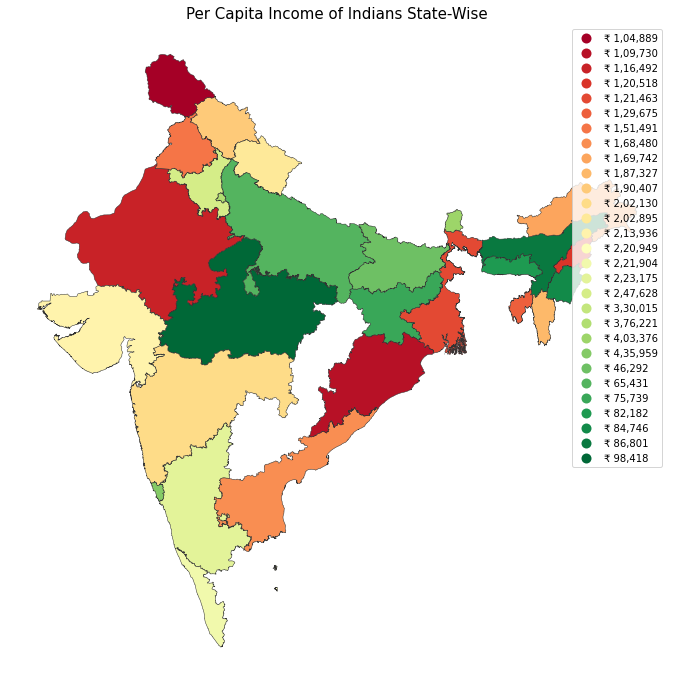

In [52]:
fig, ax = plt.subplots(1, figsize = (12,12))
ax.axis('off')
ax.set_title('Per Capita Income of Indians State-Wise', fontdict={'fontsize': '15', 'fontweight':'3'})
fig = merged.plot(column='Per Capita (Rupees)', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor = '0.2', legend = True)